In [3]:
import pandas as pd

In [4]:
health_data= pd.read_csv('Health Dataset Python\\Health_dataset.csv')

In [19]:
#data to datetime format
health_data[['Discharge Date','Date of Birth']]=health_data[['Discharge Date','Date of Birth']].apply(pd.to_datetime)

,Patient ID,Gender,Disease,Treatment,Hospital,Admission Date,Discharge Date,Treatment Status,Cause of Death,Date of Birth
0,PAT-00001,Male,Tuberculosis,Dialysis,City General Hospital,2022-12-19,2023-01-16,Recovered,NaN,1973-06-05
1,PAT-00002,Female,Malaria,Dialysis,City General Hospital,2023-03-29,2023-04-21,Recovered,NaN,1998-11-21
2,PAT-00003,Female,Malaria,Surgery,City General Hospital,2022-09-16,2022-10-15,Recovered,NaN,1942-02-14
3,PAT-00004,Male,Asthma,Dialysis,City General Hospital,2022-02-07,2022-02-11,Recovered,NaN,1943-01-17
4,PAT-00005,Female,Diabetes,Physical Therapy,City General Hospital,2022-10-25,2022-10-30,Recovered,NaN,1979-07-28
...,...,...,...,...,...,...,...,...,...,...
7995,PAT-07996,Male,HIV/AIDS,Radiotherapy,Sunrise Clinic,2022-06-28,2022-07-05,Recovered,NaN,1925-11-10
7996,PAT-07997,Female,Heart Disease,Chemotherapy,Sunrise Clinic,2022-01-28,2022-02-25,Recovered,NaN,2004-06-15
7997,PAT-07998,Male,Asthma,Dialysis,Sunrise Clinic,2022-09-14,2022-09-22,Recovered,NaN,1993-10-03
7998,PAT-07999,Male,Typhoid,Ventilation Support,Sunrise Clinic,2023-08-04,2023-08-25,Recovered,NaN,1999-02-01


double check datetime format

In [17]:
health_data['Discharge Date']

0      2023-01-16
1      2023-04-21
2      2022-10-15
3      2022-02-11
4      2022-10-30
          ...    
7995   2022-07-05
7996   2022-02-25
7997   2022-09-22
7998   2023-08-25
7999   2023-10-06
Name: Discharge Date, Length: 8000, dtype: datetime64[ns]

In [18]:
health_data['Date of Birth']

0      1973-06-05
1      1998-11-21
2      1942-02-14
3      1943-01-17
4      1979-07-28
          ...    
7995   1925-11-10
7996   2004-06-15
7997   1993-10-03
7998   1999-02-01
7999   1932-03-17
Name: Date of Birth, Length: 8000, dtype: datetime64[ns]

In [56]:
#calculate the age of each patient
health_data['Age']=round(((health_data['Discharge Date']-health_data['Date of Birth']).dt.days/365.25))

<Axes: ylabel='Frequency'>

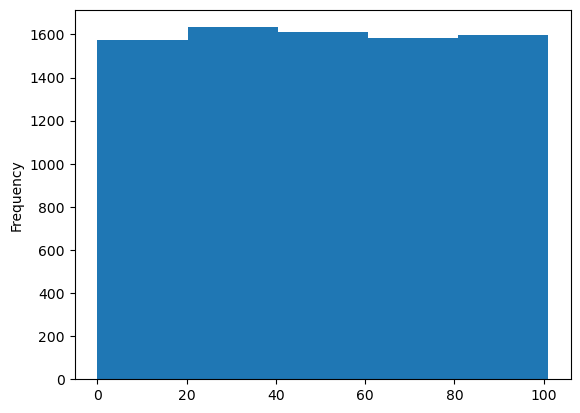

In [60]:
ax=health_data['Age'].plot(kind='hist', bins=5)


Disease count

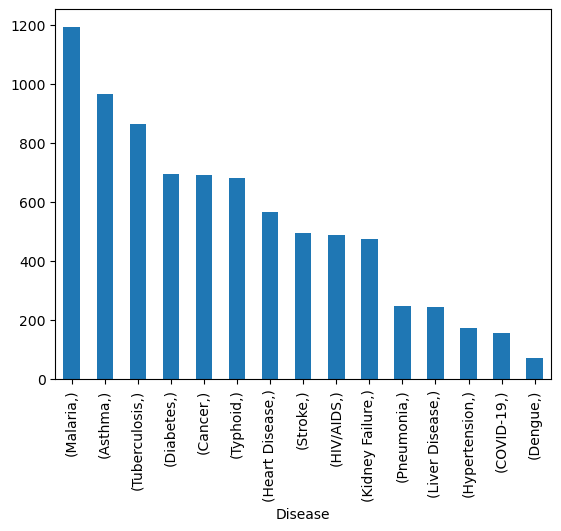

In [75]:
# count the disease cases, plot disease count
disease_count=health_data[['Disease']].value_counts()
ax=disease_count.plot(kind='bar')

In [85]:
# disease distribution by decimial
disease_percentage=disease_count/disease_count.sum()
disease_percentage

Disease       
Malaria           0.149125
Asthma            0.120750
Tuberculosis      0.108000
Diabetes          0.086750
Cancer            0.086375
Typhoid           0.085000
Heart Disease     0.070875
Stroke            0.061625
HIV/AIDS          0.061000
Kidney Failure    0.059375
Pneumonia         0.030750
Liver Disease     0.030500
Hypertension      0.021625
COVID-19          0.019625
Dengue            0.008625
Name: count, dtype: float64

In [76]:
disease_count_top_3=disease_count.nlargest(3)

In [77]:
# top3 most common diseases
disease_count_top_3

Disease     
Malaria         1193
Asthma           966
Tuberculosis     864
Name: count, dtype: int64

In [81]:
# total cases for top n diseases

# define n 
_=3 

disease_count_top_n=disease_count.nlargest(_)
top_n_disease_total=disease_count_top_n.sum()
print(f"total of most common {_} disease is :", top_n_disease_total)

total of most common 3 disease is : 3023


In [78]:
disease_count.sum()

8000

In [83]:
# top3 least common diseases
disease_count_bottom_3=disease_count.nsmallest(3)
disease_count_bottom_3

Disease     
Dengue           69
COVID-19        157
Hypertension    173
Name: count, dtype: int64

In [84]:
# total cases for bottom n diseases

# define n 
_=3 

disease_count_bottom_n=disease_count.nsmallest(_)
bottom_n_disease_total=disease_count_bottom_n.sum()
print(f"total of least common {_} disease is :", bottom_n_disease_total)

total of least common 3 disease is : 399


disease cases by gender

In [ ]:
# return pandas.Series
health_data[['Gender','Disease']].groupby('Disease').value_counts()

In [98]:
# return dataframe obj
disease_count_by_gender=health_data[['Gender','Disease']].groupby('Disease').value_counts().unstack()
disease_count_by_gender

Gender,Female,Male
Disease,,
Asthma,320,646
COVID-19,53,104
Cancer,239,452
Dengue,27,42
Diabetes,256,438
HIV/AIDS,155,333
Heart Disease,206,361
Hypertension,65,108
Kidney Failure,182,293
